# Linear Regression

## Simple Linear Regression 

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('advertising.csv')
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:xlabel='TV', ylabel='Density'>

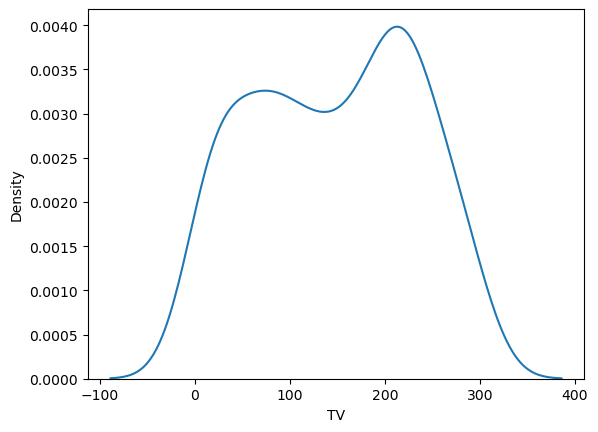

In [5]:
sns.kdeplot(df['TV'])

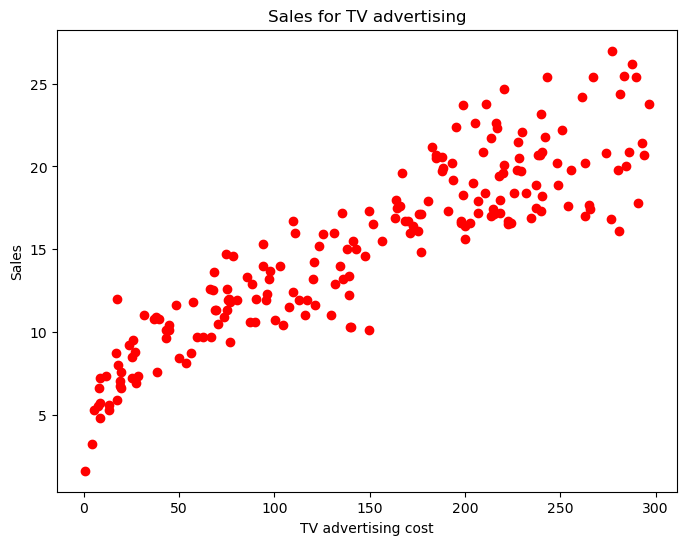

In [6]:
plt.figure(figsize = (8,6))
plt.scatter(x = df['TV'], y = df['Sales'], color = 'red')
plt.xlabel('TV advertising cost')
plt.ylabel('Sales')
plt.title('Sales for TV advertising')
plt.show()

In [7]:
x = df[['TV']]
y= df['Sales']

In [8]:
y.shape

(200,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
x_train.shape

(160, 1)

In [12]:
y_test.shape

(40,)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([0.05548294])

In [17]:
lr.intercept_

7.00710842824185

In [18]:
y_pred = lr.predict(x_test)
print(y_pred)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


In [19]:
test_vs_pred_df = pd.DataFrame({'Actual': list(y_test), 'Prediction': y_pred})
test_vs_pred_df.head()

,Actual,Prediction
0,16.9,16.067473
1,22.4,17.848476
2,21.4,23.258063
3,7.3,7.656259
4,24.7,19.230001


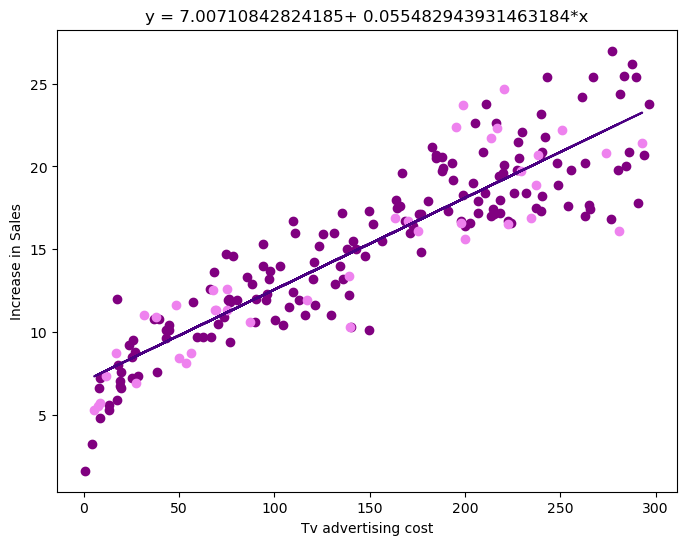

In [20]:
plt.figure(figsize = (8,6))
plt.scatter(x = x_train, y = y_train,color='purple', label = "training_data")
plt.scatter(x = x_test, y = y_test,color='violet', label = "testing_data")
plt.plot(x_test, y_pred, color='indigo')
plt.title("y = {}+ {}*x".format(lr.intercept_, lr.coef_[0]))
plt.xlabel('Tv advertising cost')
plt.ylabel('Increase in Sales')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
def mse(y_act, y_pred):
    return np.mean((y_pred- y_act)**2)

In [23]:
mse(y_act = y_test, y_pred = y_pred)

6.101072906773963

In [24]:
mean_squared_error(y_pred, y_test)

6.101072906773963

In [25]:
def mae(y_act, y_pred):
    return np.mean(abs(y_pred - y_act))

In [26]:
mae(y_act = y_test, y_pred = y_pred)

1.9502948931650088

In [27]:
mean_absolute_error(y_pred, y_test)

1.9502948931650088

In [28]:
def rmse(y_act, y_pred):
    return np.sqrt(np.mean((y_pred - y_act)** 2))

In [29]:
rmse(y_act = y_test, y_pred = y_pred)

2.470035001123256

In [30]:
mean_squared_error(y_pred, y_test, squared = False)

2.470035001123256

In [31]:
r2_score(y_test, y_pred)

0.802561303423698

In [32]:
def adjr2(actual: np.ndarray, predicted: np.ndarray, rowcount: np.int, featurecount= np.int):
    return 1-(1-r2_score(actual, predicted))*(rowcount-1)/(rowcount-featurecount)

C:\Users\rabin\AppData\Local\Temp\ipykernel_5748\1389396638.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def adjr2(actual: np.ndarray, predicted: np.ndarray, rowcount: np.int, featurecount= np.int):


In [33]:
y_test.shape[0]

40

In [34]:
adjr2(y_test, y_pred, y_test.shape[0],2)

0.7973655482506374

## Multiple Linear Regression

### Using Normal Equation

In [35]:
data = df[['TV', 'Radio']]
labels = df['Sales']

In [36]:
data.shape

(200, 2)

In [37]:
labels.shape

(200,)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 2)
(150,)
(50, 2)
(50,)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
lr.intercept_

4.8193142960357385

In [45]:
lr.coef_

array([0.05461317, 0.10204696])

In [46]:
y_pred = lr.predict(x_test)
y_pred

array([16.96232854, 20.35836726, 23.70344018,  9.2238211 , 21.85089619,
       12.49240675, 21.13931062,  8.73371742, 17.31224257, 16.67813661,
        9.04998426,  8.47024201, 17.97306191,  8.16542944, 12.65214988,
       14.9104418 ,  8.08550994, 17.98857046, 11.00323911, 20.59077178,
       20.64915314, 12.25700576, 11.00710709, 22.24647217,  9.53665961,
        7.94521271, 20.8672449 , 13.90660952, 10.78573667,  8.05374216,
       15.9963474 , 10.69050817, 20.72299317, 10.20172889, 21.56768334,
       21.32838162, 12.25333734, 22.71609552, 12.72006789,  6.48445156,
       11.94020339, 15.43488178,  9.89779562,  9.50750635, 17.29757668,
        7.28311107, 10.3077553 , 15.30275627, 11.11351935, 11.79259037])

In [47]:
mean_squared_error(y_pred, y_test)

2.356396290987084

In [48]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.535055794095799

In [49]:
mean_absolute_error(y_pred, y_test)

1.1144571493849897

In [50]:
r2_score(y_test, y_pred)

0.9133183876478477

In [51]:
def adjr2(actual: np.ndarray, predicted,n,d):
    return 1-(1-r2_score(actual, predicted))*(n-1)/(n-d-1)

In [52]:
adjr2(y_test, y_pred, y_test.shape[0],2)

0.9096298083988199

In [53]:
# plt.figure(figsize = (10,8))
# plt.subplot(x_train)

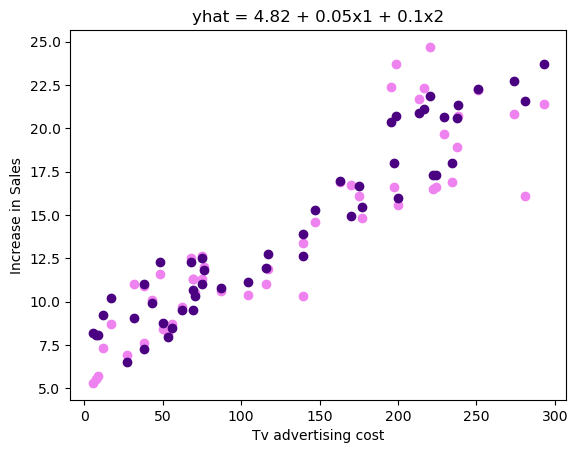

In [54]:
plt.scatter(x_test['TV'], y_test, color = 'violet')
plt.scatter(x_test['TV'], y_pred, color = 'indigo')
plt.title("yhat = {} + {}x1 + {}x2".format (round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1],2)))
plt.xlabel('Tv advertising cost')
plt.ylabel('Increase in Sales')
plt.show()

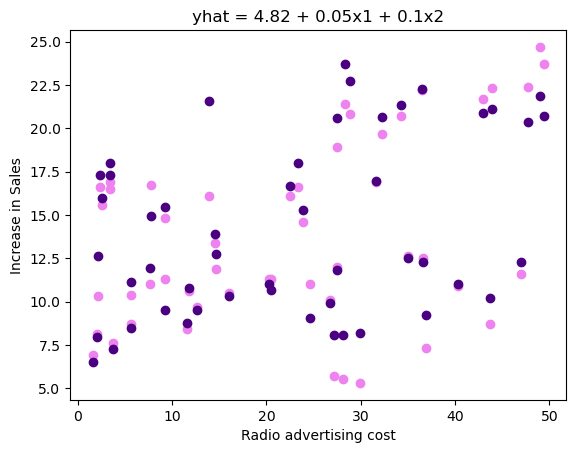

In [55]:
plt.scatter(x_test['Radio'], y_test, color = 'violet')
plt.scatter(x_test['Radio'], y_pred, color = 'indigo')
plt.title("yhat = {} + {}x1 + {}x2".format (round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1],2)))
plt.xlabel('Radio advertising cost')
plt.ylabel('Increase in Sales')
plt.show()

In [56]:
#Using subplot for above plots 

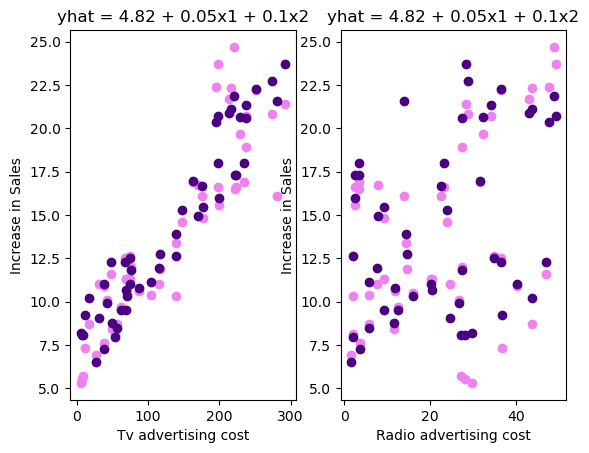

In [57]:
#plot 1
plt.subplot(1,2,1)
plt.scatter(x_test['TV'], y_test, color = 'violet')
plt.scatter(x_test['TV'], y_pred, color = 'indigo')
plt.title("yhat = {} + {}x1 + {}x2".format (round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1],2)))
plt.xlabel('Tv advertising cost')
plt.ylabel('Increase in Sales')

#plot 2
plt.subplot(1,2,2)
plt.scatter(x_test['Radio'], y_test, color = 'violet')
plt.scatter(x_test['Radio'], y_pred, color = 'indigo')
plt.title("yhat = {} + {}x1 + {}x2".format (round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1],2)))
plt.xlabel('Radio advertising cost')
plt.ylabel('Increase in Sales')
plt.show()

In [58]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [59]:

# plt.scatter(x_test['TV'], y_test, color = 'violet')
# plt.scatter(x_test['TV'], y_pred, color = 'indigo')
# plt.title("yhat = {} + {}x1 + {}x2 + {}x3".format (round(lr.intercept_,2),
#                                            round(lr.coef_[0],2),
#                                            round(lr.coef_[0],2),
#                                            round(lr.coef_[1],2)))
# plt.xlabel('Tv advertising cost')
# plt.ylabel('Increase in Sales')

In [60]:
data = df.drop('Sales', axis = 1)
labels = df['Sales']

In [61]:
data.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [62]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
lr.intercept_

4.5808382620012615

In [66]:
lr.coef_

array([0.05458395, 0.10285501, 0.00116146])

In [67]:
y_pred = lr.predict(x_test)
y_pred

array([12.3412275 ,  8.85052578, 21.11681801, 10.32121667, 19.36794713,
        9.06731857,  7.89750805, 19.15877983, 17.81492815, 14.00926888,
       19.19072027, 10.23604384, 20.69653473,  9.69832631,  8.26922533,
       20.65990064, 21.29476717, 12.44484426, 18.77317864, 17.01297888,
       11.73138996, 13.70298825, 18.44739118, 21.23253085,  9.3047278 ,
       22.11413327, 20.58831147, 20.07540528, 11.52318155,  6.99434969,
       15.62828017, 10.12753309, 14.87330816, 18.66537811, 20.21416773,
       17.07261411, 11.12035421, 18.05820018,  9.46031977,  9.56668765,
       13.40574814, 13.67948435,  7.73164498, 15.73347212, 16.62705902,
       18.8826236 ,  8.83302122, 19.40472449, 12.06130107,  9.47865007])

In [68]:
mean_squared_error(y_pred, y_test)

2.5223686204052167

In [69]:
mean_absolute_error(y_pred, y_test)

1.2487330563570658

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.5881966567164207

In [71]:
r2_score(y_test, y_pred)

0.8970697728877651

In [72]:
def adjr2(actual: np.ndarray, predicted,n,d):
    return 1-(1-r2_score(actual, predicted))*(n-1)/(n-d-1)

In [73]:
adjr2(y_test, y_pred, y_test.shape[0],3)

0.8903569319891411

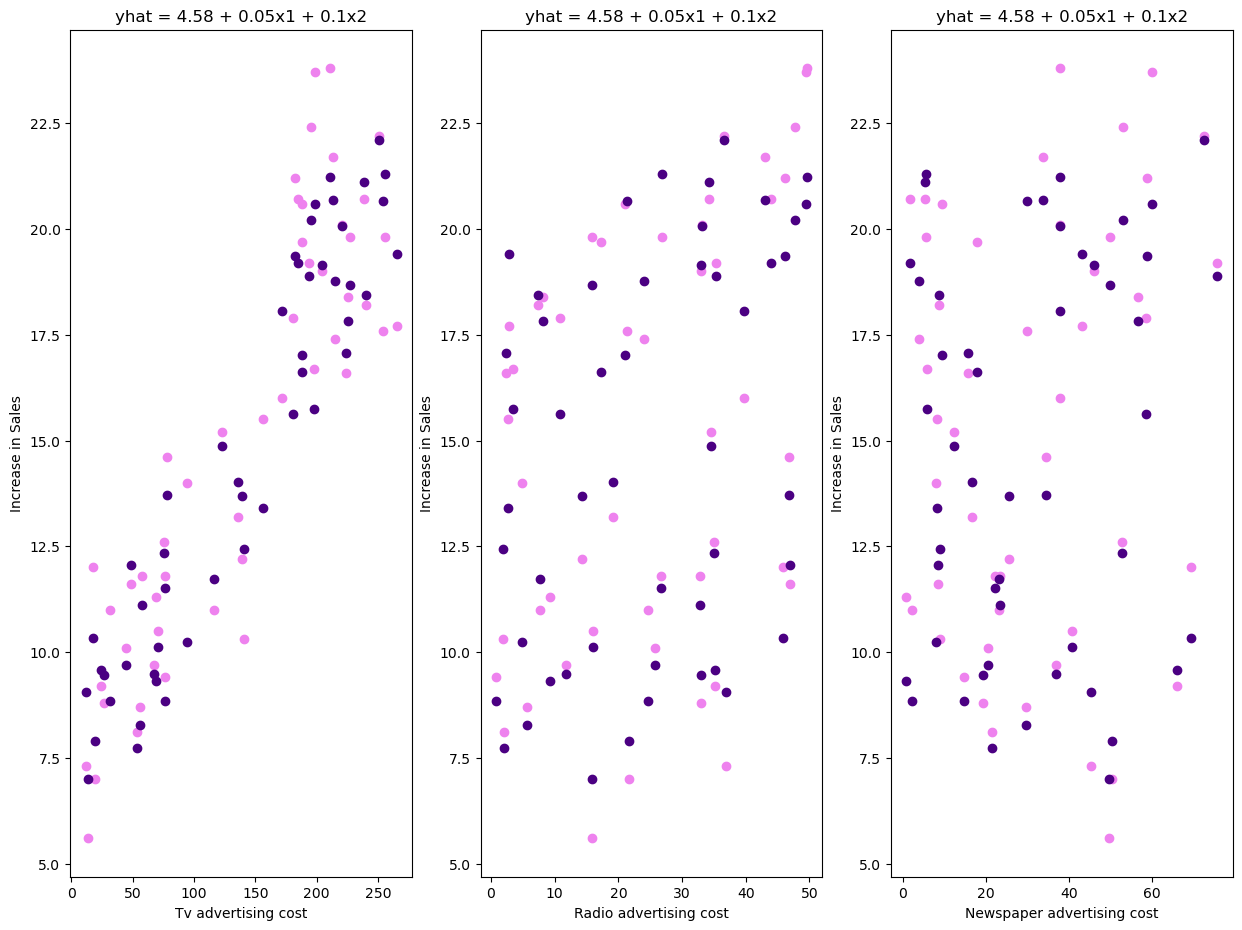

In [74]:
plt.figure(figsize = (15,11))
#plot 1
plt.subplot(1,3,1)
plt.scatter(x_test['TV'], y_test, color = 'violet')
plt.scatter(x_test['TV'], y_pred, color = 'indigo')
plt.title("yhat = {} + {}x1 + {}x2".format (round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1],2)))
plt.xlabel('Tv advertising cost')
plt.ylabel('Increase in Sales')

#plot 2
plt.subplot(1,3,2)
plt.scatter(x_test['Radio'], y_test, color = 'violet')
plt.scatter(x_test['Radio'], y_pred, color = 'indigo')
plt.title("yhat = {} + {}x1 + {}x2".format (round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1],2)))
plt.xlabel('Radio advertising cost')
plt.ylabel('Increase in Sales')

#plot 3
plt.subplot(1,3,3)
plt.scatter(x_test['Newspaper'], y_test, color = 'violet')
plt.scatter(x_test['Newspaper'], y_pred, color = 'indigo')
plt.title("yhat = {} + {}x1 + {}x2".format (round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1],2)))
plt.xlabel('Newspaper advertising cost')
plt.ylabel('Increase in Sales')
plt.show()

## Assumptions For Linear Regression

### 1. Linearity

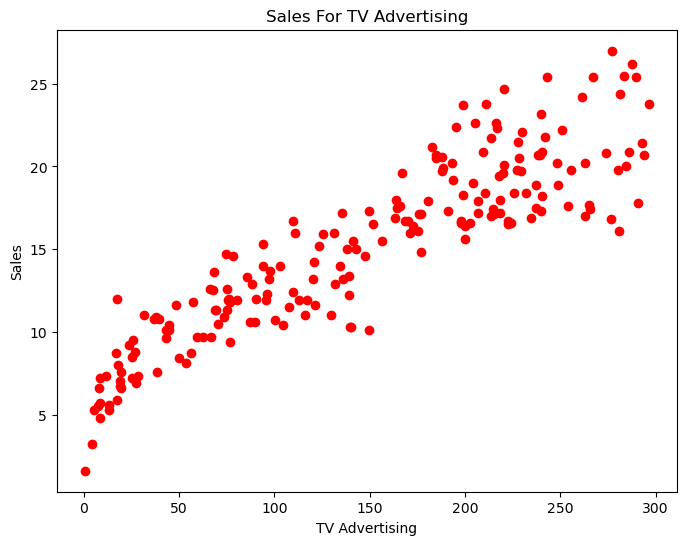

In [87]:
plt.figure(figsize = (8, 6))
plt.scatter(x = df['TV'], y = df['Sales'], color = 'red')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Sales For TV Advertising')
plt.show()

In [89]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### 2. Normality:

In [75]:
data = df[['TV']]
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25)
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
residuals = predictions - y_test

<AxesSubplot:xlabel='Sales', ylabel='Density'>

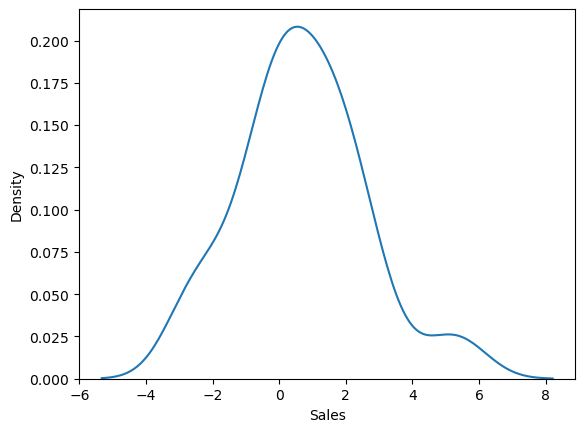

In [76]:
import warnings
warnings.filterwarnings('ignore')
sns.kdeplot(residuals)

### 3. No multicollinearity 

In [77]:
data = df[['TV']]
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25)
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
residuals = predictions - y_test

In [78]:
df['twice_radio'] = df['Radio'] *2

<AxesSubplot:>

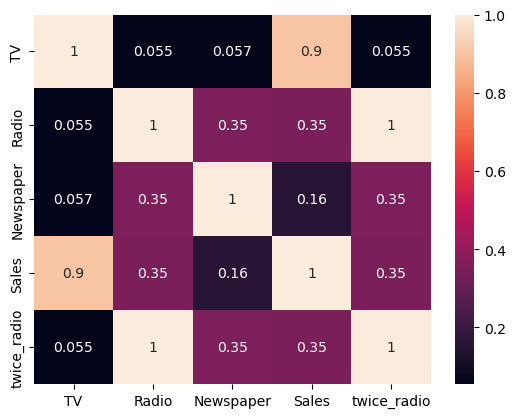

In [79]:
sns.heatmap(df.corr(), annot = True)

In [80]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv('Advertising.csv')
data = df.drop('Sales', axis =1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size = 0.25)

lr = LinearRegression()

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
residuals = predictions - y_test

In [86]:
# calculate the variance inflation factor (VIF) for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["Features"] = x_train.columns

# print the VIFs
print(vif)

   VIF Factor   Features
0    2.526387         TV
1    3.096194      Radio
2    3.178962  Newspaper


### 4.Independence

In [92]:
from statsmodels.stats.stattools import durbin_watson
vif = pd.DataFrame()

In [95]:
dw_stastistic = durbin_watson(residuals)
print('Durbin-Watson stastistic:', dw_stastistic)

Durbin-Watson stastistic: 1.8810735055998855


### 5. Homoscedasticity

In [96]:
df = pd.read_csv('advertising.csv')
data = df.drop('Sales', axis = 1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size = 0.25)

lr = LinearRegression()

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
residuals = predictions - y_test

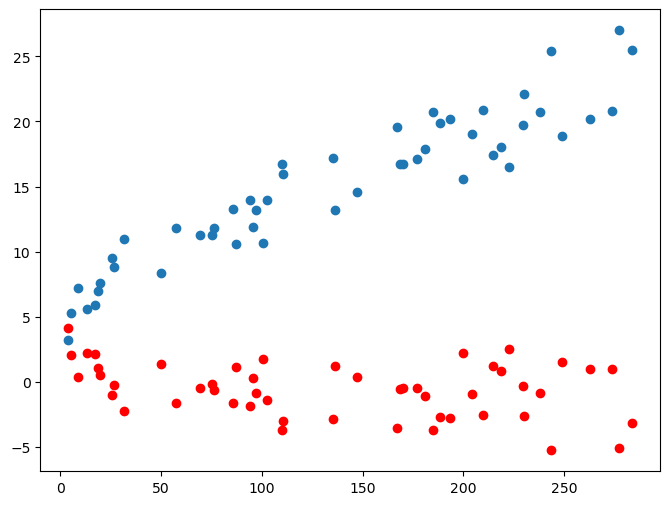

In [100]:
plt.figure(figsize = (8,6))
plt.scatter(x_test['TV'], y_test)
plt.scatter(x_test['TV'], residuals, color='red')
plt.show()

In [113]:
# plt.figure(figsize = (8,6))
# plt.scatter(x_test['TV'], residuals, color='red')
# plt.scatter(x_test['Radio'], residuals, color='green')
# plt.scatter(x_test['Newspaper'], residuals, color='yellow')
# plt.show()

# Bias Variance TradeOffs In Machine Learning

## Regularization In Regression
    ->Lasso Regression
    ->Ridge Regression

### Lasso Regression

In [114]:
from sklearn.linear_model import Lasso

In [115]:
df = pd.read_csv('advertising.csv')
data = df.drop('Sales', axis = 1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, random_state = 42)

In [141]:
lasso = Lasso(alpha = 5)

In [142]:
lasso.fit(x_train, y_train)

Lasso(alpha=5)

In [143]:
lasso.intercept_

5.386621086167763

In [144]:
lasso.coef_

array([0.0540168 , 0.08045406, 0.        ])

### Ridge Regession

In [136]:
from sklearn.linear_model import Ridge

In [137]:
data = df.drop('Sales', axis = 1)
labels = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, random_state = 42)

In [145]:
ridge = Ridge(alpha =5)

In [146]:
ridge.fit(x_train, y_train)

Ridge(alpha=5)

In [147]:
ridge.coef_

array([0.05450917, 0.10092855, 0.00434107])